<a href="https://colab.research.google.com/github/mgje/PIUMP/blob/master/lab/covid-data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.offsetbox import AnchoredText

sns.set_context("paper", font_scale=0.5)
sns.set_style("ticks")

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
df.date = pd.to_datetime(df.date)
df = df.rename(columns={
    "date": "Date",
    "location": "Country",
    "new_deaths_per_million": "Daily Deaths per Million",
    "new_deaths_smoothed_per_million": "Daily Deaths per Million (Smoothed)"
})



df.aged_65_older /= 100
df.diabetes_prevalence /= 100
df["Daily Deahts per Million in Population 65+"] = 1000000 * df.new_deaths_smoothed / (df.population * df.aged_65_older)
df["Daily Deahts per Million in Population 65+ (Life Expectancy Adjusted)"] = (
    df["Daily Deahts per Million in Population 65+"] * (df.life_expectancy / df.life_expectancy.max())
)

countries = ["Switzerland", "Germany", "France", "Italy", "Austria"]
df_neighbors = df[(df["Country"].isin(countries))]

countries = ["Switzerland", "Spain", "Portugal", "Belgium", "United Kingdom"]
df_other_european_countries = df[(df["Country"].isin(countries))]

countries = ["Switzerland", "United States", "South Africa", "China", "Japan", "Australia"]
df_world = df[(df["Country"].isin(countries))]

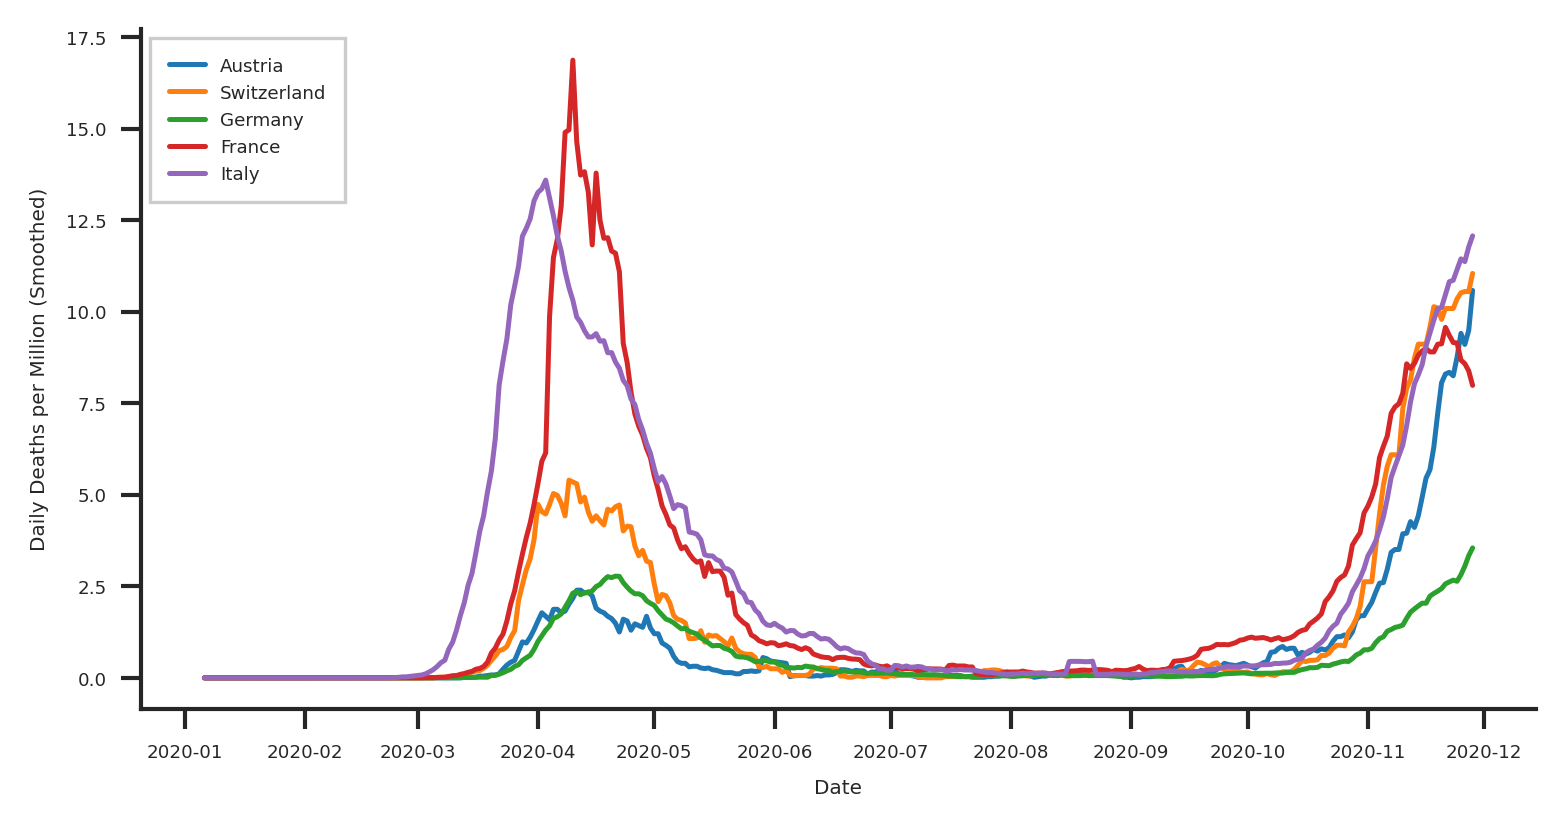

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=300)
ax.xaxis.grid(False)
fig.patch.set_facecolor("white")
sns.lineplot(data=df_neighbors, x="Date", y="Daily Deaths per Million (Smoothed)", hue="Country", ax=ax)
ax.legend(loc="upper left", fancybox=False, framealpha=1, shadow=False, borderpad=1)
sns.despine()

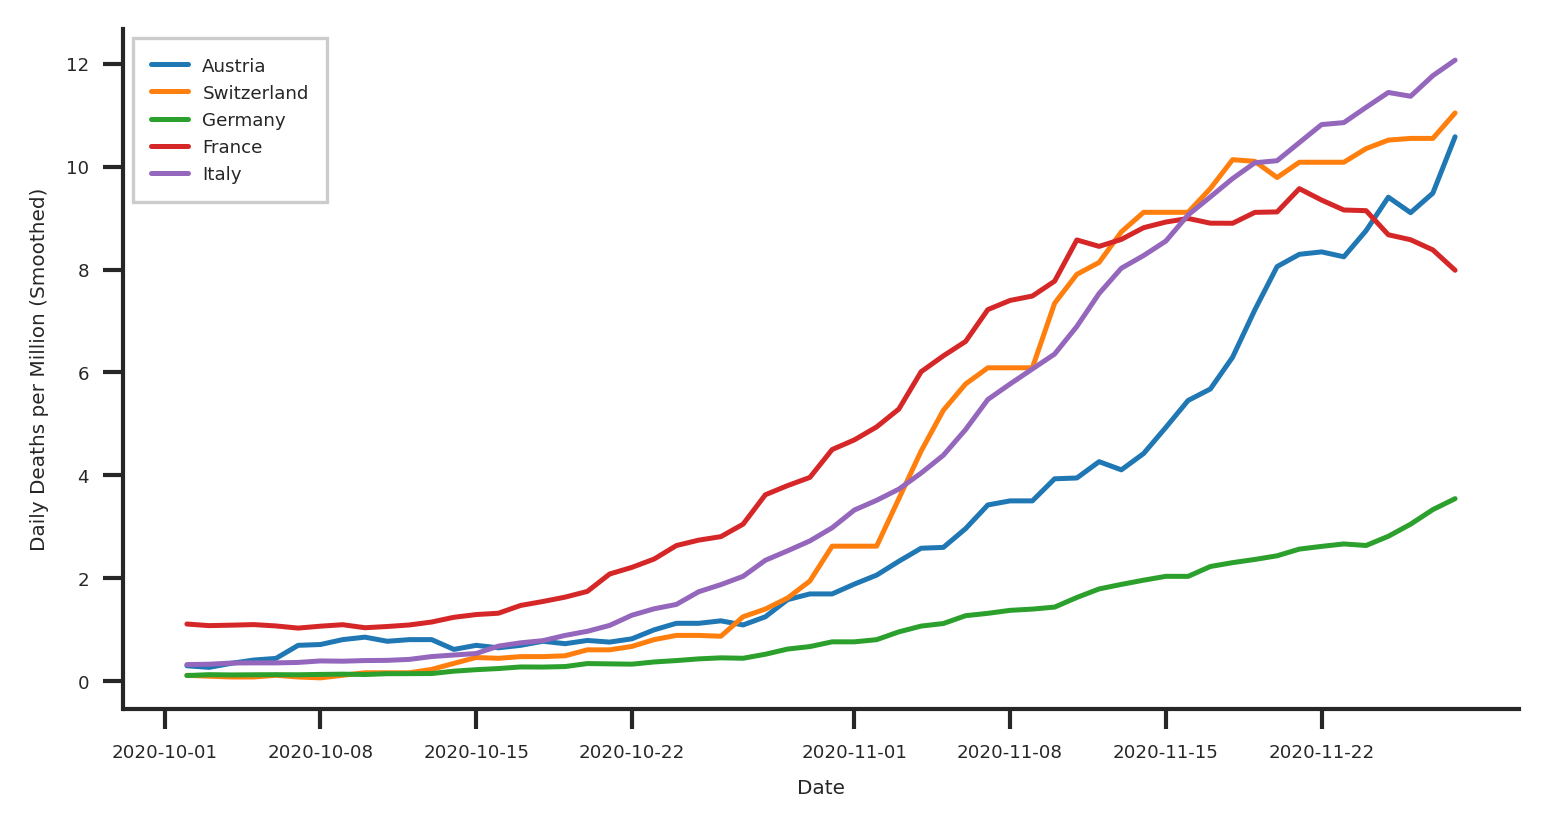

In [ ]:
df_limited = df_neighbors[df_neighbors.Date > pd.to_datetime("2020-10-01")]
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=300)
ax.xaxis.grid(False)
fig.patch.set_facecolor("white")
sns.lineplot(data=df_limited, x="Date", y="Daily Deaths per Million (Smoothed)", hue="Country", ax=ax)
ax.legend(loc="upper left", fancybox=False, framealpha=1, shadow=False, borderpad=1)
sns.despine()

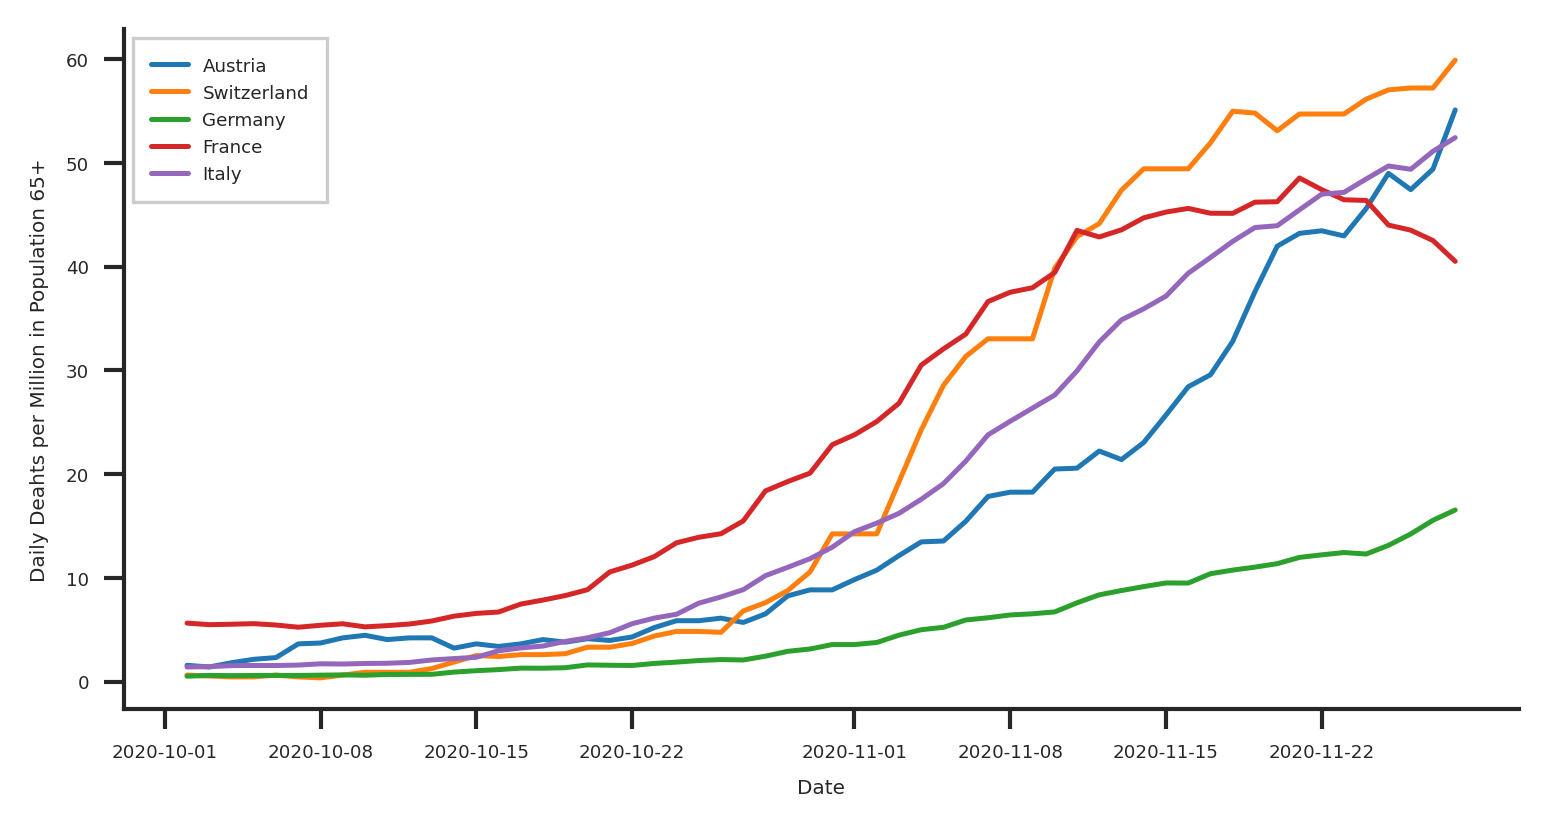

In [ ]:
df_limited = df_neighbors[df_neighbors.Date > pd.to_datetime("2020-10-01")]
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=300)
ax.xaxis.grid(False)
fig.patch.set_facecolor("white")
sns.lineplot(data=df_limited, x="Date", y="Daily Deahts per Million in Population 65+", hue="Country", ax=ax)
ax.legend(loc="upper left", fancybox=False, framealpha=1, shadow=False, borderpad=1)
sns.despine()

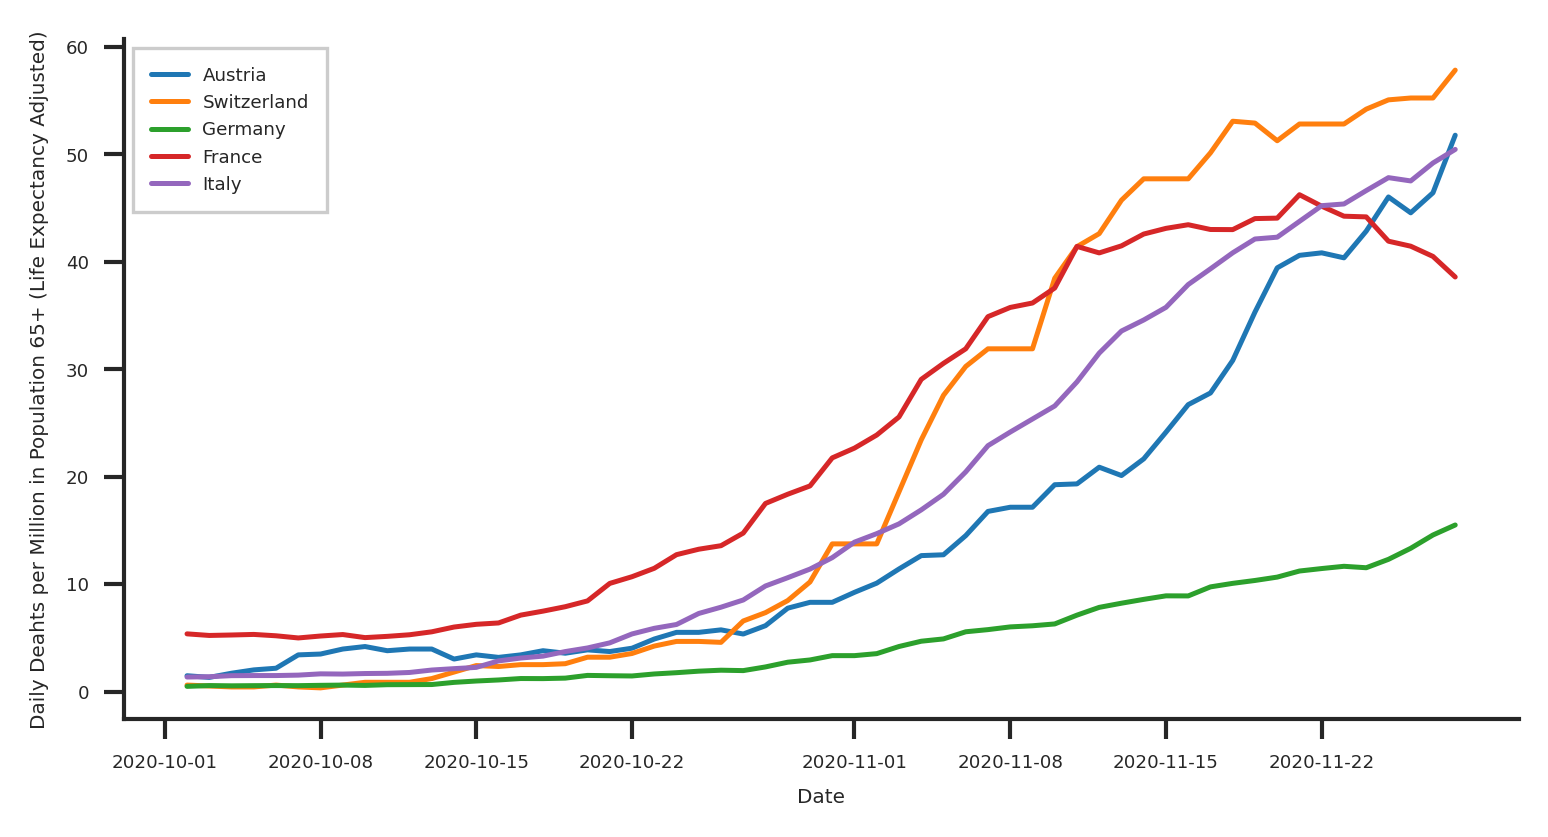

In [ ]:
df_limited = df_neighbors[df_neighbors.Date > pd.to_datetime("2020-10-01")]
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=300)
ax.xaxis.grid(False)
fig.patch.set_facecolor("white")
sns.lineplot(data=df_limited, x="Date", y="Daily Deahts per Million in Population 65+ (Life Expectancy Adjusted)", hue="Country", ax=ax)
ax.legend(loc="upper left", fancybox=False, framealpha=1, shadow=False, borderpad=1)
sns.despine()

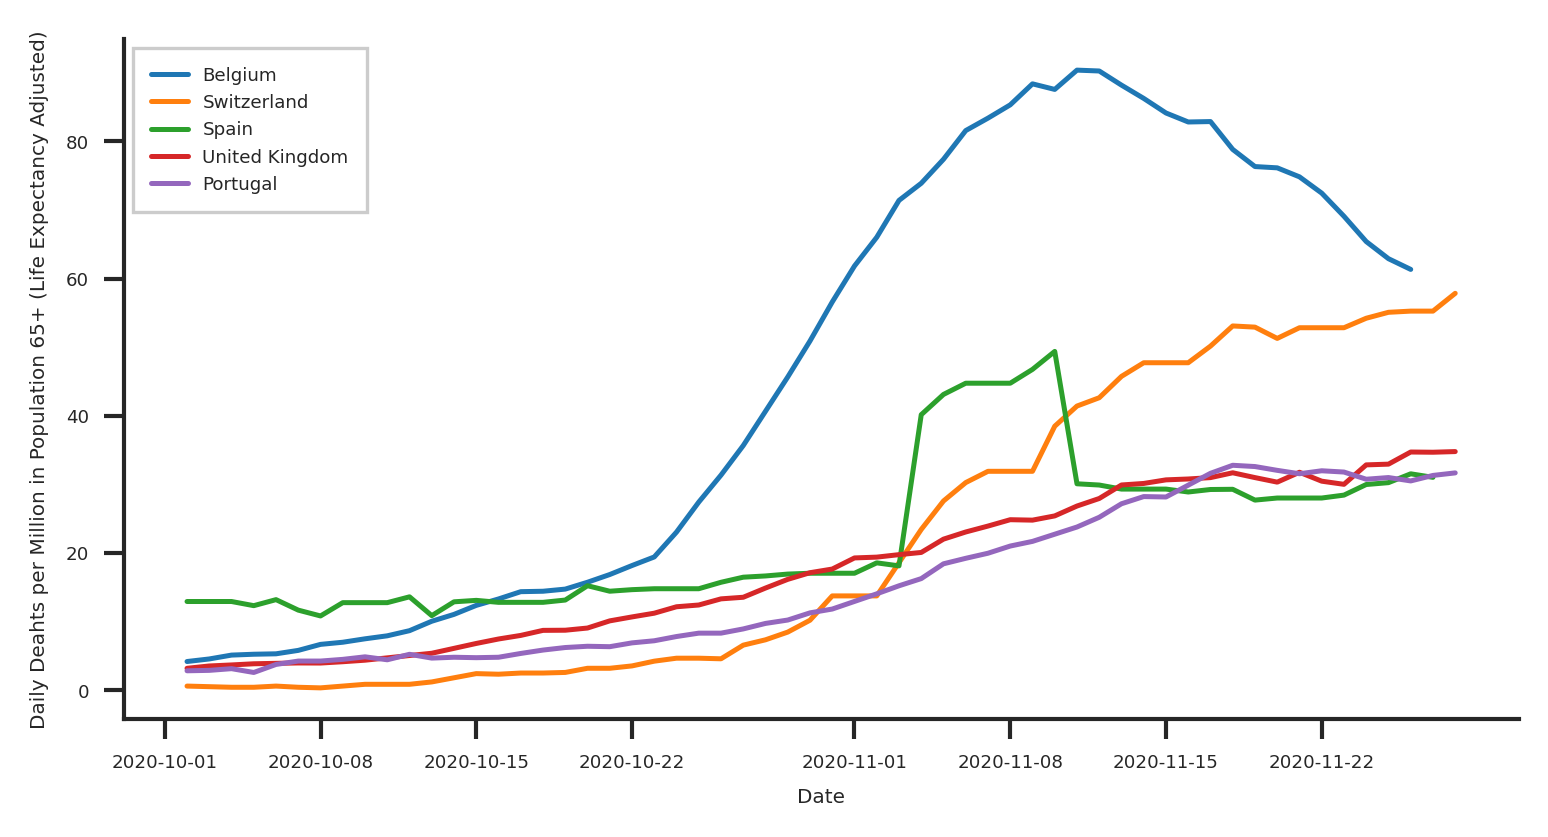

In [ ]:
df_limited = df_other_european_countries[df_other_european_countries.Date > pd.to_datetime("2020-10-01")]
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=300)
ax.xaxis.grid(False)
fig.patch.set_facecolor("white")
sns.lineplot(data=df_limited, x="Date", y="Daily Deahts per Million in Population 65+ (Life Expectancy Adjusted)", hue="Country", ax=ax)
ax.legend(loc="upper left", fancybox=False, framealpha=1, shadow=False, borderpad=1)
sns.despine()

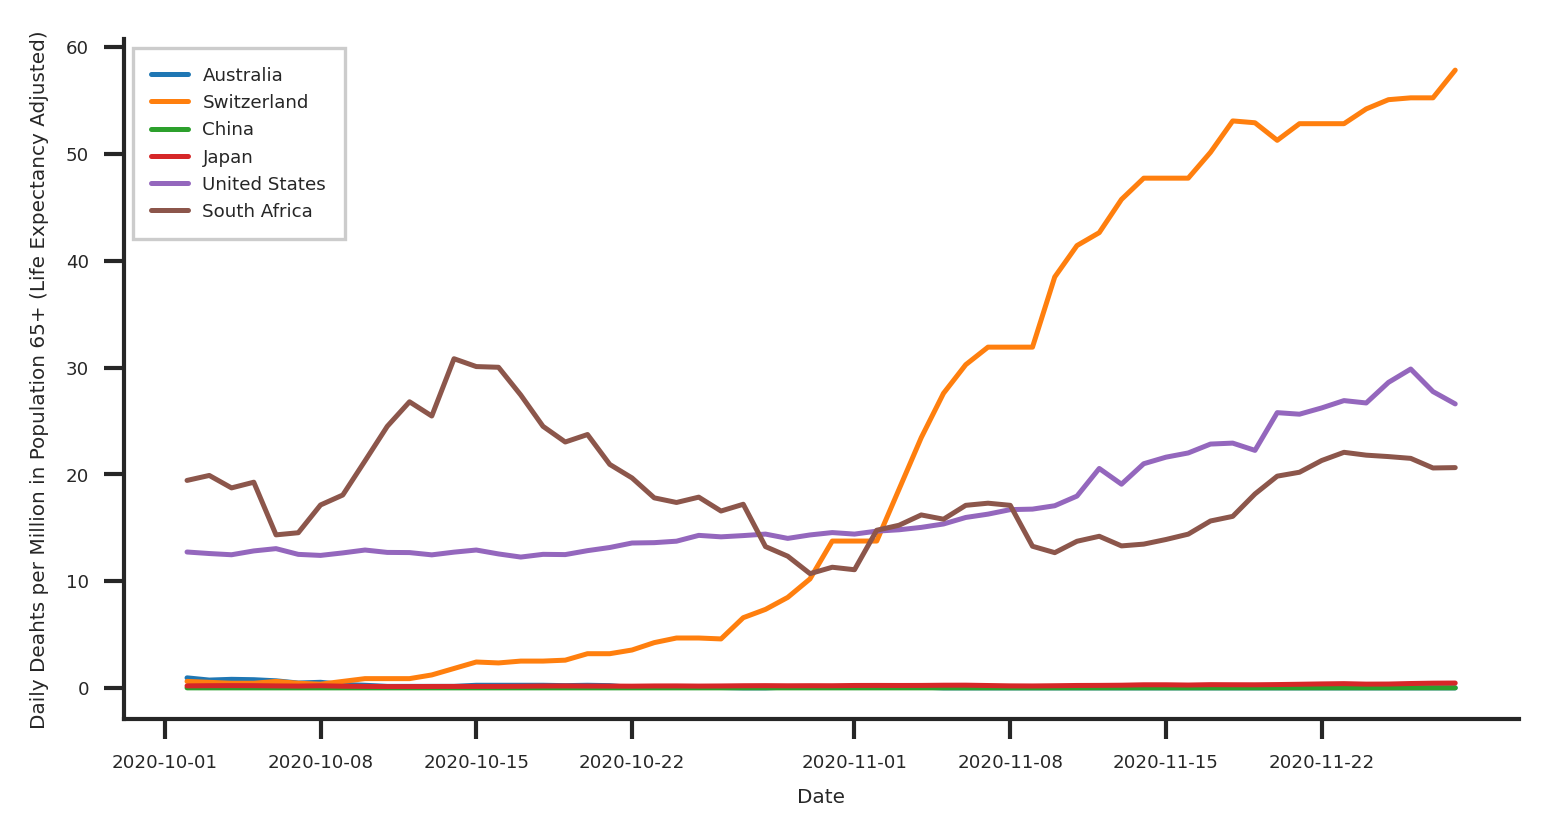

In [ ]:
df_limited = df_world[df_world.Date > pd.to_datetime("2020-10-01")]
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=300)
ax.xaxis.grid(False)
fig.patch.set_facecolor("white")
sns.lineplot(data=df_limited, x="Date", y="Daily Deahts per Million in Population 65+ (Life Expectancy Adjusted)", hue="Country", ax=ax)
ax.legend(loc="upper left", fancybox=False, framealpha=1, shadow=False, borderpad=1)
sns.despine()